# Визуализация данных в Python для ML

Перед тем, как обучать тяжелые модели, важно посмотреть на данные.
Хорошая визуализация позволяет многое узнать о датасете: зависимости между признаками, распределения значений, скрытые тренды.
Также является мощным методом анализа результатов и помогает наглядно сравнить разные модели между собой, посмотреть важность признаков, понять слабые места решения и куда копать дальше.

## Обзор инструментов

Для начала вспомним основы библиотек, с помощью которых на Python можно хранить данные и визуализировать их. Для хранения данных рассмотрим `numpy` и `pandas`, а для визуализации посмотрим на библиотеки `matplotlib`, `seaborn` и `plotly`.

In [4]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

### Anaconda

Anaconda — это дистрибутив Python, в который встроен пакетный менеджер `conda`. Этот инструмент позволяет выделить отдельные окружения для ваших проектов, например, на Python или R. В каждом конкретном окружении будут свои версии языков программирования и библиотек. Это позволит не запутаться в том, какие версии библиотек у вас установлены, а таже даст вам возможность переносить окружения.

Установку можете произвести с <a href="https://www.anaconda.com/distribution/">официального сайта</a>.

Пример создания окружения `mipt-stats`:

```bash
conda create -n mipt-stats python=3.7 r=3.6 --yes
```

Активация и деактивация:

```bash
conda activate mipt-stats
conda deactivate
```

Чтобы поставить пакеты, используйте команду `conda install`:

```bash
conda install numpy
```

Чтобы понять, как работать с Anaconda оптимальнее, смотрите <a href="https://mipt-stats.gitlab.io/courses/python/01_anaconda.html">полную версию материала</a>.

#### Альтернативы

* Если вы используете Linux-систему, то чаще проще обойтись без Anaconda, а использовать `pip`, например, 
```bash
pip install numpy
```
В таком случае тоже можно настроить виртуальное окружение. Однако не стоит смешивать использование `pip` и `conda`!

* Если вы не хотите ничего себе устанавливать, например, из-за малых мощностей, можно использовать <a href="https://colab.research.google.com/">Google Colab</a>. Но в таком случае каждый раз придется заново настраивать окружение, кроме того, среда выполнения может отключаться при длительном простое.

### Jupyter

Jupyter предоставляет веб-интерфейс для редактирования jupyter-ноутбуков. Это удобный инструмент для того, чтобы быстро писать код на Python (или других языках), проверять гипотезы, строить графики, делать интерактивные визуализации и делиться результатами с коллегами.

Чтобы запустить интерфейс, поставьте в `conda` пакет `jupyter` и выполните в консоли команду

```bash
jupyter notebook
```

Jupyter-ноутбук состоит из ячеек с кодом, с markdown, а также с сырым текстом. Работать с ячейкой можно в двух режимах: Command Mode и Edit Mode. Чтобы переходить между ними, используйте `Esc` и `Enter`.

В Edit Mode управление похоже на `vim`, справку по Command Mode можно посмотреть с помощью сочетания клавиш `Esc + H`.

При написании кода, кроме функций языка программирования, можно пользоваться магией Юпитера, или jupyter magics. Это отдельный метаязык внутри jupyter, команды которого начинаются на `%`. Можете открыть список всех доступных команд:

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

Есть magics, которые применяются к строке или всей клетке в целом. Чтобы посмотреть помощь по интересующей команде, можно вызвать help:

In [3]:
?%lsmagic

Впоследствии увидим, как можно замерить производительность вашей программы при помощи `%%time`.

Если хотите посмотреть подробный обзор jupyter magic, узнать о преимуществах Jupyter, узнать полезные сочетания клавиш и установить удобные плагины, обращайтесь к <a href="https://mipt-stats.gitlab.io/courses/python/02_jupyter.html">полным материалам по Jupyter</a>.

### NumPy

В пакете  NumPy представлены удобные функции для работы c $n$-мерными массивами. В нём имеются функции для поэлементных операций, а также для работы с массивами, как с математическими объектами, например, функции для линейной алгебры.

Они реализованы на C++, поэтому гораздо эффективнее аналогичных реализаций на Python.

### Основы

Создавать массивы можно различными способами.

In [5]:
# Из списка
a = np.array([0, 2, 1])

# Из равномерной сетки
grid = np.linspace(0, 1, 500)

# Перечисление 0, 1, 2, 3, 4
nat_grid = np.arange(5)

# Заполненный нулями
zeros = np.zeros((1, 2, 3))

У массивов можно узнать их размерность, форму и число элементов

In [6]:
print(zeros.ndim, zeros.shape, zeros.size)

3 (1, 2, 3) 6


Индексация похожа на индексацию списков

In [7]:
print(a[2:1:-1])
print(grid[::100])
print(zeros[:, :2, :2])

[1]
[0.         0.2004008  0.4008016  0.6012024  0.80160321]
[[[0. 0.]
  [0. 0.]]]


### Соединение массивов и их форма

Из одномерного массива можно сделать двумерный, указав необходимую форму.

In [8]:
A = np.arange(6).reshape((2, 3))
A

array([[0, 1, 2],
       [3, 4, 5]])

Два массива можно склеить горизонтально

In [9]:
B = np.zeros((2, 5))
np.hstack([A, B])

array([[0., 1., 2., 0., 0., 0., 0., 0.],
       [3., 4., 5., 0., 0., 0., 0., 0.]])

и вертикально

In [10]:
B = np.zeros((1, 3))
np.vstack([A, B])

array([[0., 1., 2.],
       [3., 4., 5.],
       [0., 0., 0.]])

### Операции над массивами

Обычные арифметические операции работают поэлементно.

In [11]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])

In [12]:
print(a * b)

[ 3  8 15]


In [13]:
print(np.sin(a))

[0.84147098 0.90929743 0.14112001]


Двумерный массив можно умножить на одномерный, как матрицу на вектор. Операция `@` реализует матричное умножение

In [14]:
A = np.ones((2, 3))
b = np.ones(3)
A @ b

array([3., 3.])

Транспонировать матрицу можно с помощью метода `T`

In [15]:
A.T.shape

(3, 2)

### Способы суммирования

Простое суммирование возвращает сумму всех элементов массива.

In [16]:
print(np.sum(a))
print(a.sum())

6
6


С многомерными массивами суммирование может работать сложнее. Например, можно суммировать вдоль определённой оси и получать не одно число, а массив.

In [17]:
a = np.ones((3, 4), dtype=int)
print(a.sum(axis=1))
print(a.sum(axis=0))

[4 4 4]
[3 3 3 3]


Для более продвинутых способов суммирования существуют, например, <a href="https://numpy.org/doc/stable/reference/generated/numpy.einsum.html">суммы Эйнштейна</a>.

### Бродкастинг

Broadcasting &mdash; процедура обработки массивов с различными формами во время арифметических операций. При соблюдении определенных ограничений меньший массив приводится к форме по большему массиву.

Рассмотрим поэлементное умножение двух массивов одинаковой формы

In [18]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

А теперь массивы разной формы

In [19]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

Результат получился тем же, поскольку в данном случае произошло растяжение массива `b` до размеров массива `a` с помощью дублирования элементов массива `b`.

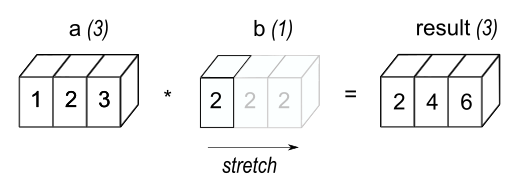

*Примечание.* Термин "растяжение" используется лишь для понимания. Операции реализуются более "умным" способом без лишнего копирования элементов.

**Правило бродкастинга**

При работе с двумя массивами numpy сравнивает их формы начиная с крайних правых размерностей. Два измерения совместимы, если
* они равны или
* одна из них равна 1.
Если эти условия не выполняются, возникает `ValueError`.

Посмотрим еще на пример

In [20]:
a = np.array([[ 0.0,  0.0,  0.0],
           [10.0, 10.0, 10.0],
           [20.0, 20.0, 20.0],
           [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Растяжение в данном случае произошло следующим образом
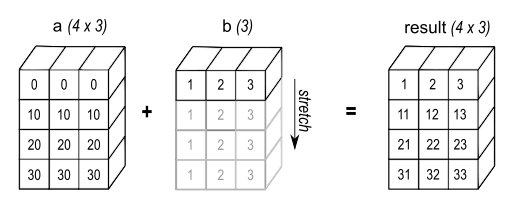

А если размеры будут не совместимы, то произойдет ошибка
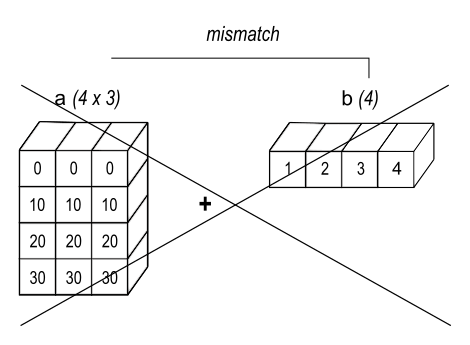

In [21]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Если массивы имеют несовместимый размер, можно их сначала привести к одной форме

In [22]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a.reshape((-1, 1)) + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Соответствующее растяжение
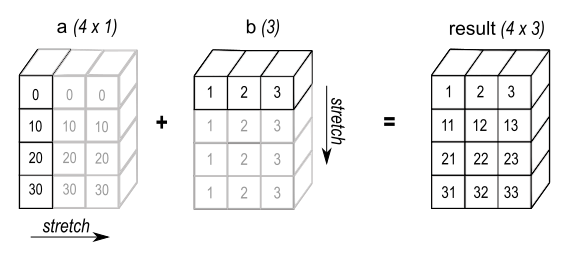

### Matplotlib

Модуль `matplotlib` — одно из популярных средств для построения графиков. При использовании `matplotlib` не забудьте написать `%matplotlib inline` для того, чтобы графики отображались в вашем окне браузера.

Начнём с построения простых графиков.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

График, соединяющий точки, строится с помощью `plt.plot`. Передаём список $x$ и $y$. Если не хотите соединять точки, используйте `plt.scatter`.

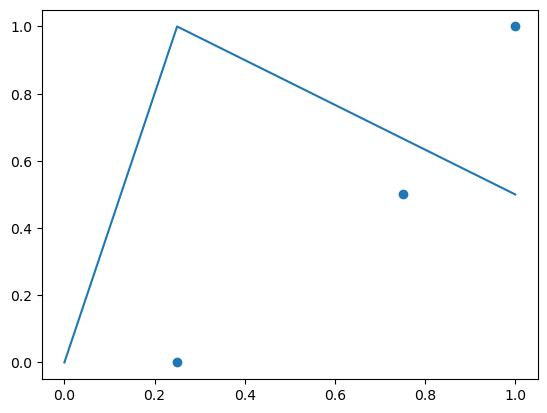

In [24]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.scatter([0.25, 0.75, 1], [0, 0.5, 1])
plt.show()

Можно изображать несколько кривых, тогда они будут рисоваться разными цветами. Чтобы рисовать график функции, достаточно соединить много точек.

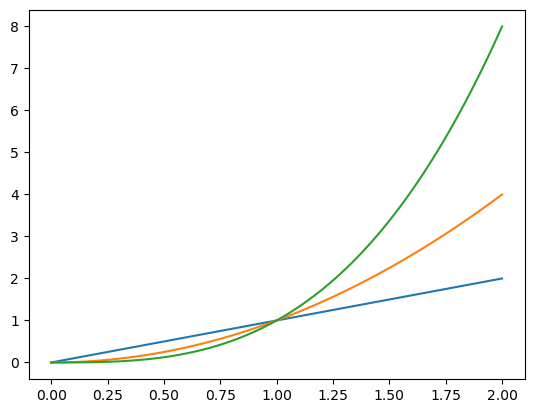

In [25]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x)
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.show()

На график можно добавить подписи, легенду, настроить цвета и стиль линий.

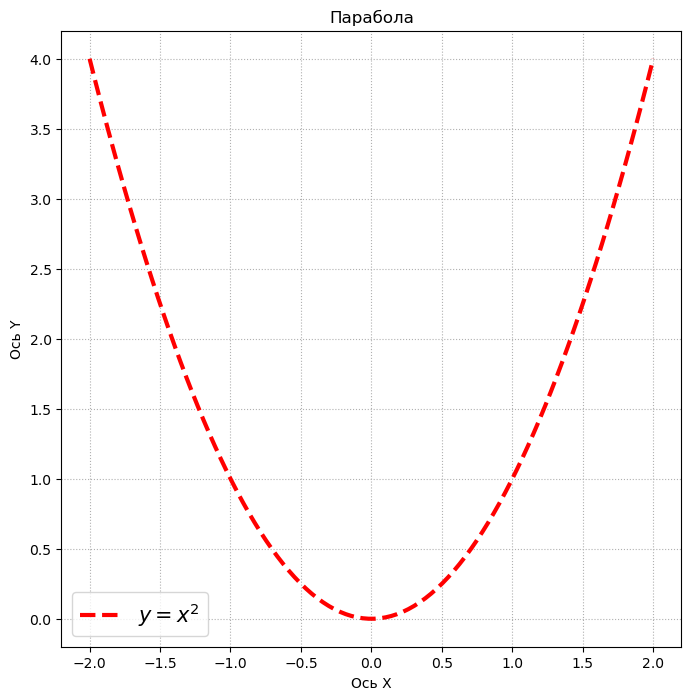

In [26]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x ** 2, linestyle='--', lw=3, 
         label='$y=x^2$', color='red')
plt.xlabel('Ось X'), plt.ylabel('Ось Y')
plt.legend(fontsize=15, loc=3)
plt.title('Парабола')
plt.grid(ls=':')
plt.show()

Закрасить область между двумя кривыми $y=y(x)$ можно с помощью функции `plt.fill_between`, а между двумя кривыми вида $x = x(y)$ ---  с помощью функции `plt.fill_betweenx`.

Горизонтальные линии можно нарисовать с помощью `plt.hlines`, а вертикальные --- с помощью `plt.vlines`.

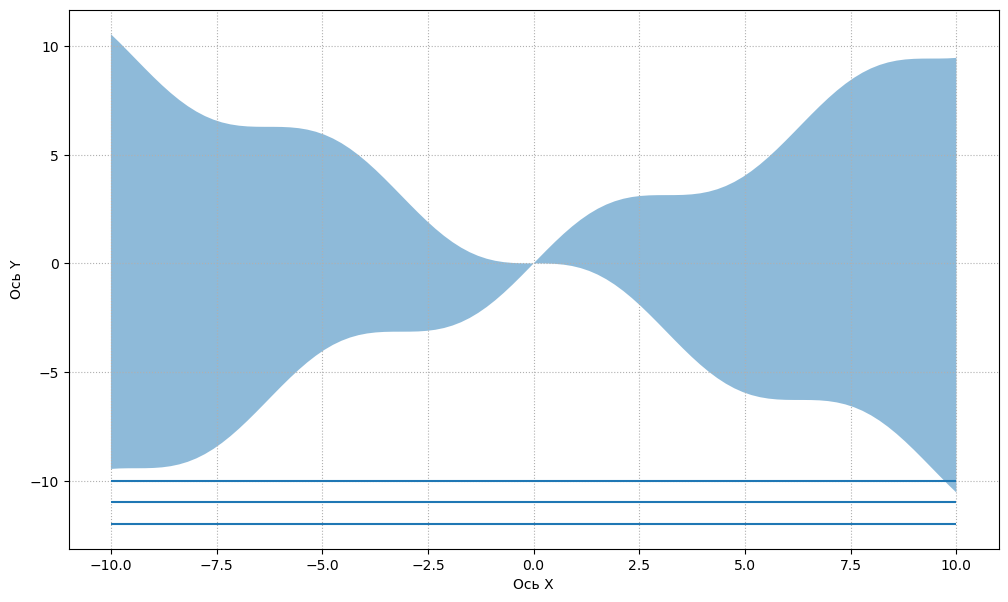

In [27]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 7))
plt.fill_between(x, -x+np.sin(x), x+np.sin(x), alpha=0.5)
plt.hlines([-10, -11, -12], -10, 10)
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(ls=':')
plt.show()

Кроме графиков в двумерных координатах, `matplotlib` позволяет строить трёхмерные графики или поверхности.

In [28]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

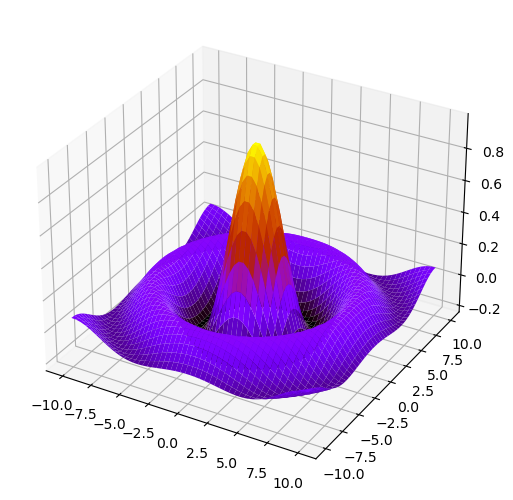

In [29]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
fig.add_axes(ax)
plt.savefig("my_3d_plot.png")  # полученный график можно сохранить
plt.show()

Чтобы посмотреть, как ещё можно настраивать графики в matplotlib, строить контурные графики и делать пиксельные картинки, можете перейти к <a href="https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html">полному материалу</a>.

### Plotly

<a target="_blank" href="https://plotly.com/python/">Plotly</a> &mdash; бесплатная графическая библиотека с открытым исходным кодом, в последние годы набирающая популярность в Data Science среде. Ее ключевое преимущество перед `seaborn` и `matplotlib` — удобство построения сложных интерактивных визуализаций — полноценных мини-приложений, которые делают результат работы аналитика более доступным для конечного пользователя. 

Подробнее про установку можно почитать на <a target="_blank" href="https://plotly.com/python/getting-started/">этой</a> странице.

Для корректного отображения данных в `jupyter notebook` стоит вызвать специальную функцию библиотеки

In [30]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  

#### График функций

Для начала сравним построение обычных графиков с помощью `plotly` и с помощью `matplotlib`. 
Предположим, мы хотим нарисовать на отрезке $[-1, 1]$ функции $f(x) = x^2$ и $g(x) = \sin(10x)$. Определим значения функций по сетке

In [31]:
x = np.linspace(-1, 1, 101)
y1 = x**2
y2 = np.sin(10*x)

Построить график с помощью `matplotlib` можно следующим образом

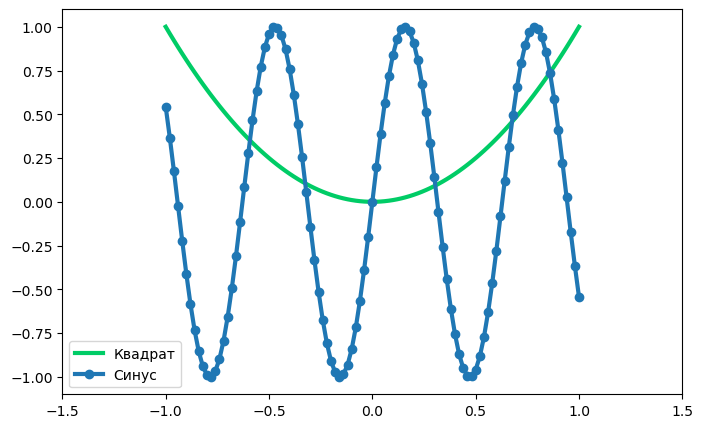

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label='Квадрат', lw=3, color='#00CC66')
plt.plot(x, y2, label='Синус', lw=3, marker='o')
plt.legend()
plt.xlim((-1.5, 1.5))
plt.show()

С помощью `plotly` графики рисуются с помощью следующей общей конструкции:

```python
    fig = go.Figure()
    fig.add_tra
    ce(что рисовать)
    fig.update_layout(параметры фигуры)
    fig.update_xaxes(параметры оси абсцисс)
    fig.update_yaxes(параметры оси ординат)
    fig.show()
```

Теперь нарисуем наши функции с помощью `plotly`.

In [33]:
# объявляем фигуру
fig = go.Figure()

# добавляем первый график
fig.add_trace(
    go.Scatter(
        x=x, y=y1,  # данные
        name='Квадрат',  # имя в легенде
        marker=dict(color='#00CC66'),  # цвет в html-формате 
        opacity=0.8,  # прозрачность
        line={'width': 3}  # свойства линии - толщина
    )
)

# добавляем второй график
fig.add_trace(
    go.Scatter(
        x=x, y=y2,  # данные
        mode='lines+markers',  # линии и точки
        name='Синус',  # имя в легенде
        marker=dict(  # свойства маркера
            color='rgba(255,48,0,1)',  # цвет в rgb-формате 
            size=7  # размер маркера
        ), 
        opacity=0.8,  # прозрачность
        line={'width': 3}  # свойства линии - толщина
    )
)

# свойства фигуры
fig.update_layout(
    height=450, width=700,  # размер фигуры
    title_text='Простой график функций',  # заголовок графика
    title_font_size=16,  # размер заголовка
    plot_bgcolor='rgba(0,0,0,0.05)',  # цвет фона
)

# параметры оси абсцисс
fig.update_xaxes(
    range=[-1.5, 1.5],  # ограничение графика
    zeroline=True,  # рисовать линию x=0
    zerolinewidth=2  # толщина линии x=0
)

# параметры оси ординат
fig.update_yaxes(
    zeroline=True,  # рисовать линию y=0
    zerolinewidth=2,  # толщина линии y=0
    zerolinecolor='LightGray'  # цвет линии y=0
)

# показать график
fig.show()

График интерактивный:
* при наведении мышкой на линию появляется окошко, в которой указаны координаты точки и имя линии;
* с помощью выделения можно указать прямоугольную область, которую нужно приблизить;
* вернуть исходный масштаб можно двойныл щелчком или кнопкой на панели сверху;
* кликами по легенде можно убирать линии с графика.


Следующей функцией можно сохранить фигуру в html-формате.

In [34]:
plotly.offline.plot(fig, filename='example.html', auto_open=False)

'example.html'

*Замечание.*
На сайте Plotly содержится полная документация со списом всех возможных параметров. Если параметр принимает в качестве значения словарь других параметров, то в документации приводится также список этих параметров.
Ссылки на документацию для конкретных функций:
* <a target="_blank" href="https://plotly.com/python/reference/scatter/">Scatter</a>;
* <a target="_blank" href="https://plotly.com/python/reference/layout/">update_layout</a>;
* <a target="_blank" href="https://plotly.com/python/reference/layout/xaxis/">update_xaxes</a>;
* <a target="_blank" href="https://plotly.com/python/reference/layout/yaxis/">update_yaxes</a>.

### Pandas и Seaborn

Зачастую данные можно представлять в виде матрицы объекты-признаки. В этом случае данные являются табличными, именно с ними мы будем работать, изучая методы классического машинного обучения. Для удобного хранения таблиц с именованными колонками (датафреймов), в Python есть библиотека `pandas`.

Посмотрим использование этой библиотеки на примере вместе с `seaborn` &mdash; более продвинутой библиотекой визуализации данных на основе `matplotlib`.

Подробные обучающие ноутбуки можно посмотреть по ссылкам:
* <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html" target="_blank">Библиотека pandas — типы данных Series и DataFrame, запись и чтение файлов, работа с датами.</a>
* <a href="https://mipt-stats.gitlab.io/courses/python/10_pandas2.html" target="_blank">Библиотека pandas — объединение таблиц, группировки, таблицы сопряженности и сводные таблицы.</a>
* <a href="https://mipt-stats.gitlab.io/courses/python/09_seaborn.html" target="_blank">Библиотека seaborn.</a>

### Титаник

Был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа.

Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

### Чтение данных

<i><a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html#3.-Чтение-и-запись-данных" target="_blank">Подробнее про чтение и запись данных.</a></i>

Прочитаем данные с помощью библиотеки `pandas`. Библиотека pandas предназначена для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

При чтении укажем, что первую колонку нужно использовать в качестве индекса (т.е. ключа) в таблице: `index_col=0`.

Мы видим таблицу со следующими колонками:
* `Pclass` — класс пассажира (`1` — высший, `2` — средний, `3` — низший);
* `Name` — имя;
* `Sex` — пол;
* `Age` — возраст;
* `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
* `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;
* `Ticket` — номер билета;
* `Fare` — плата за проезд;
* `Cabin` — каюта;
* `Embarked` — порт посадки (`C` — Шербур; `Q` — Квинстаун; `S` — Саутгемптон).

In [35]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Можно вывести только строго указанное количество строк

In [36]:
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Соответствующая переменная имеет тип данных `DataFrame`.

In [37]:
type(data)

pandas.core.frame.DataFrame

### Способы извлечения данных

Данные из отдельной колонки

In [38]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Если имя колонки "достаточно хорошее", то можно и так

In [39]:
data.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Данные по столбцу имеют тип данных `Series`.

In [40]:
type(data.Name)

pandas.core.series.Series

Можно вытащить сразу несколько колонок

In [41]:
data[['Survived', 'Pclass', 'Name']]

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


Имена всех колонок

In [42]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Список всех индексов таблицы (т.е. ключей)

In [43]:
data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

Название колонки-индекса

In [44]:
data.index.name

'PassengerId'

Тип данных в каждой из колонок таблицы

In [45]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Строку таблицы, соответствующую *ключу 1*, можно получить через `loc`

In [46]:
data.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

Обратите внимание, что *обычный численный индекс* этой строки равен 0. По нему также можно извлекать строку с мопощью `iloc`.

In [47]:
data.iloc[0]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

Если же попробовать запустить

то возникнет исключение `KeyError: 0`, поскольку ключа `0` в этой таблице нет.

Можно извлечь несколько строк

In [48]:
data.iloc[0:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Можно извлечь конкретное значение

In [49]:
data.iloc[0]['Name']

'Braund, Mr. Owen Harris'

Или так

In [50]:
data.iloc[0, 2]

'Braund, Mr. Owen Harris'

### Примеры анализа данных из таблицы

#### Простые операции из `pandas`

Все описательные статистики по каждой колонке с вещественным типом данных

In [51]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Идентификация пропусков в таблице

In [52]:
data.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


Можно посчитать долю пропущенных значений в каждой колонке

In [53]:
data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Сортировка по столбцу

In [54]:
data.sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### Графики с помощью `seaborn`

Посмотрим, как можно работать с библиотекой `seaborn`. Это популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Она имеет высокоуровневый интерфейс и по умолчанию может строить более эстетичные графики.

Построим гистограмму по возрасту отдельно для мужчин и женщин.

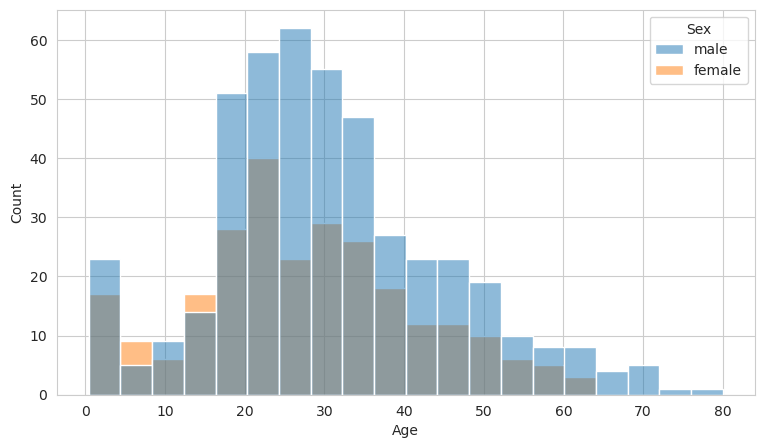

In [55]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data, x='Age', hue='Sex')

На `matplotlib` тоже можно построить гистограммы, но для этого придётся строить несколько гистограмм, по-отдельности выделяя нужные строки. Явно отличается удобство, красота и количество кода в пользу `seaborn`

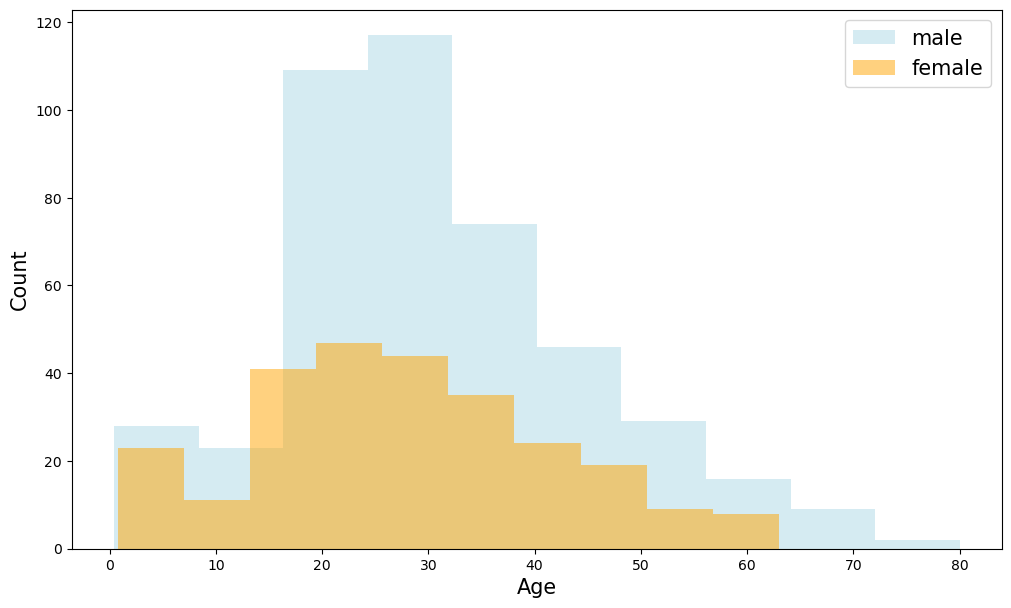

In [56]:
plt.figure(figsize=(12, 7))
plt.hist(data[data.Sex == 'male'].Age, label='male', color='lightblue', alpha=0.5)
plt.hist(data[data.Sex == 'female'].Age, label='female', color='orange', alpha=0.5)
plt.legend(fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Построим боксплоты (ящики с усами) для стоимости билета в зависимости от класса. Они показывают медиану, квартили, а также выбросы. Подробнее про такой ниже в ноутбуке.

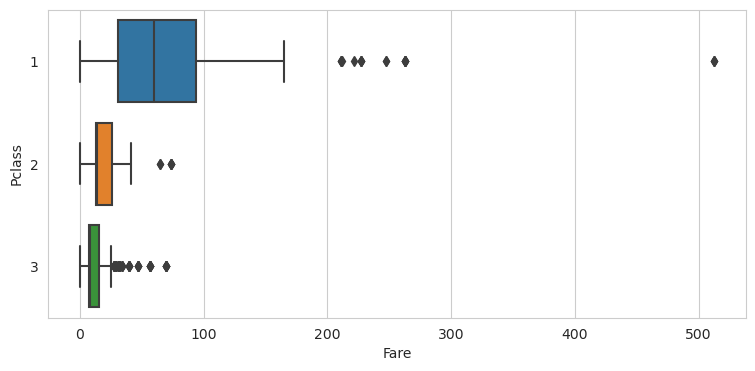

In [57]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')

Ограничим значения по горизонтальной оси

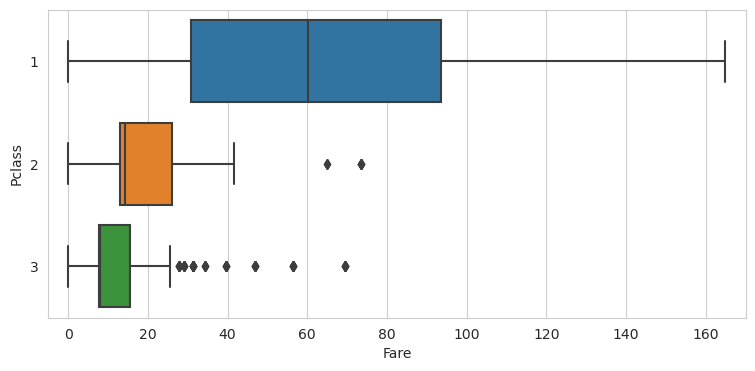

In [58]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')
    plt.xlim((-5, 170))

#### Более сложные операции из `pandas`

<i><a href="https://mipt-stats.gitlab.io/courses/python/10_pandas2.html" target="_blank">Подробнее про группировку данных.</a></i>

Сгруппируем данные по классу и усредним по всем численным колонкам 

In [59]:
data.groupby(by='Pclass').mean()

C:\Users\gromo\AppData\Local\Temp\ipykernel_11204\1365807773.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Похожим образом можно для каждого класса посчитать функции минимума и максимума. По строковым колонкам нельзя посчитать максимум и минимум, поэтому уберём их из рассмотрения.

In [60]:
data.drop(['Cabin', 'Embarked'], axis=1).groupby(by='Pclass').aggregate([min, max])

Survived                               Name  \
            min max                            min   
Pclass                                               
1             0   1  Allen, Miss. Elisabeth Walton   
2             0   1            Abelson, Mr. Samuel   
3             0   1            Abbing, Mr. Anthony   

                                        Sex         Age       SibSp     Parch  \
                                max     min   max   min   max   min max   min   
Pclass                                                                          
1          Young, Miss. Marie Grice  female  male  0.92  80.0     0   3     0   
2         del Carlo, Mr. Sebastiano  female  male  0.67  70.0     0   3     0   
3       van Melkebeke, Mr. Philemon  female  male  0.42  74.0     0   8     0   

            Ticket             Fare            
       max     min         max  min       max  
Pclass                                         
1        4  110152   WE/P 5735  0.0  512.3292  
2        3   11668   W/C 14208  0.0   73.5000  
3        6   12460  W./C. 6609  0.0   69.5500

---

<i><a href="https://mipt-stats.gitlab.io/courses/python/10_pandas2.html#4.-Таблицы-сопряженности-(Crosstab)-и-сводные-таблицы-(Pivot-table)" target="_blank">Подробнее про агрегирующие функции.</a></i>

С помощью функции `crosstab` можно очень легко получить информацию о том, сколько человек определенного пола ехали в таком-то классе, а также сумму по строкам и столбцам.

In [61]:
pd.crosstab(data['Sex'], data['Pclass'], margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


А с помощью похожей функции `pivot_table` можно легко получить информацию о том, каков максимальный возраст среди пассажиров определенного пола для каждого класса.

In [62]:
pd.pivot_table(
    data, 
    values='Age', 
    index='Sex',
    columns='Pclass', 
    aggfunc=np.max
)

Pclass,1,2,3
Sex,,,
female,63.0,57.0,63.0
male,80.0,70.0,74.0


### Pandas и Plotly

Если вы хотите построить интерактивные графики из табличных данных, можете воспользоваться библиотекой `plotly`

#### Капитализация Apple

Загрузим данные с информацией о капитализации компании Apple в зависимости от месяца.

In [63]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/'\
    'plotly/datasets/master/finance-charts-apple.csv'
)
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


Построим график по этим данным, к которому добавим также слайдер, предоставляющий возможность возможность выделять интересующий диапазон дат.

In [64]:
fig = go.Figure()

# две кривые
fig.add_trace(go.Scatter(x=df.Date, y=df['AAPL.High'], name="AAPL High"))
fig.add_trace(go.Scatter(x=df.Date, y=df['AAPL.Low'], name="AAPL Low"))

# свойства графика
fig.update_layout(
    title_text='Финансы компании "Apple"',
    title_font_size=20,
    yaxis_title='Стоимость',
    xaxis_rangeslider_visible=True  # слайдер
)

fig.show()

Ешё более интерактивные графики можно построить при помощи `plotly.express`.

Рассмотрим встроенные в Plotly данные [Gapminder Foundation](https://en.wikipedia.org/wiki/Gapminder_Foundation) — просветительской Шведской организации, которая анализирует финансовое неравенство в мире.

In [65]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


Следующая функция строит интерактивный график, где по одной оси отложен ВВП, по другой — прогноз средней продолжительности жизни. Размер каждой точки на графике пропорционален размеру государства. 

На графике присутствует слайдер, с помощью которого можно выбирать конкретный год.

In [66]:
px.scatter(
    df,  # таблица с данными
    x="gdpPercap", y="lifeExp",  # названия колонок, используемых как координата
    animation_frame="year",  # колонка, определяющая слайдер
    animation_group="country",  # колонка, отвечающая за объект (страну)
    size="pop",  # колонка, отвечающая за размер точек
    color="continent",  # колонка, отвечающая за цвет точек
    hover_name="country",  # колонка, отвечающая за подпись информации о точке
    log_x=True,  # логарифмический масштаб
    size_max=55,  # максимальный размер круга
    range_x=[100, 100000], range_y=[25, 90]  # пределы графика
)

С более продвинутыми визуализациями можно ознакомиться [в официальной галерее](https://plot.ly/python/).

### Рекомендации по оформлению графиков

* На презентации

## Визуализация для машинного обучения

Дальше посмотрим, как визуализировать данные для машинного обучения. Разберём, на какие графики можно смотреть при первом взгляде на полученный датасет.

### Квартет Энскомба (или почему важна визуализация)

Бывает такое, что датасеты с разными зависимостями имеют одинаковые численные свойства. Чаще всего при анализе смотрят на среднее и дисперсию отдельных признаков, а также попарные корреляции. Но даже если совпадают эти характеристики, данные могут быть устроены совершенно по-разному.

Пронаблюдаем это на примере квартета Энскомба, одного из стандартных наборов данных, имеющихся внутри библиотеки `seaborn`.

Для начала загрузим данные.

In [67]:
df = sns.load_dataset("anscombe")

datasets = ['I', 'II', 'III', 'IV']
data = []
for dataset in datasets:
    data.append(df[df['dataset'] == dataset][['x','y']].values)

Выведем численные характеристики

In [68]:
%precision 2
for i in range(4):
    print("MEAN: ", data[i].mean(axis=0), "STD: ", data[i].std(axis=0), "CORR: ", np.corrcoef(data[i].T)[0,1])

MEAN:  [9.  7.5] STD:  [3.16 1.94] CORR:  0.81642051634484
MEAN:  [9.  7.5] STD:  [3.16 1.94] CORR:  0.8162365060002428
MEAN:  [9.  7.5] STD:  [3.16 1.94] CORR:  0.8162867394895982
MEAN:  [9.  7.5] STD:  [3.16 1.94] CORR:  0.8165214368885031


А теперь визуализируем эти данные

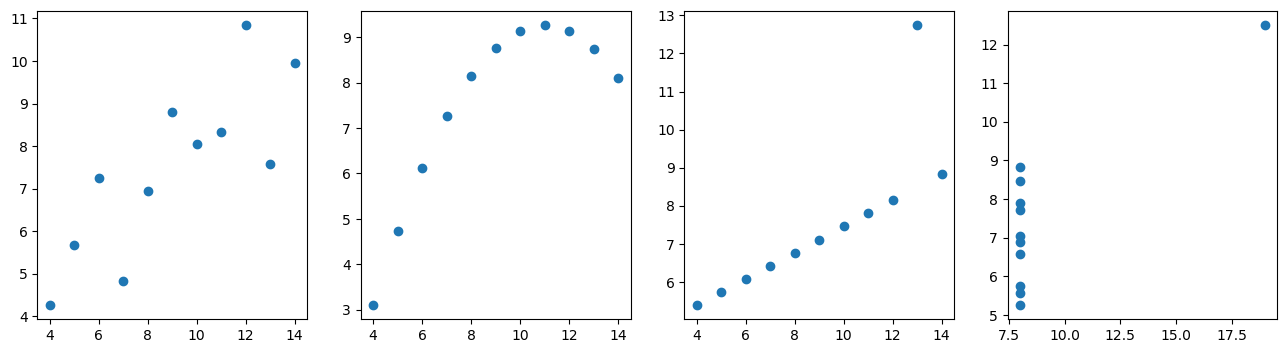

In [69]:
plt.figure(figsize=(16, 4))
for idx, X in enumerate(data):
    plt.subplot(1, 4, idx + 1)  # создаём графики по порядку
    plt.scatter(X[:, 0], X[:, 1])

### Визуализация признаков

Для каждого признака стоит посмотреть на его распределение. Для этого стоит построить гистограмму или KDE (ядерную оценку плотности). Ядерная оценка плотности приближает по выборке плотность распределения, из которого она получена. Совместить эти визуализации можно при помощи `sns.distplot`.

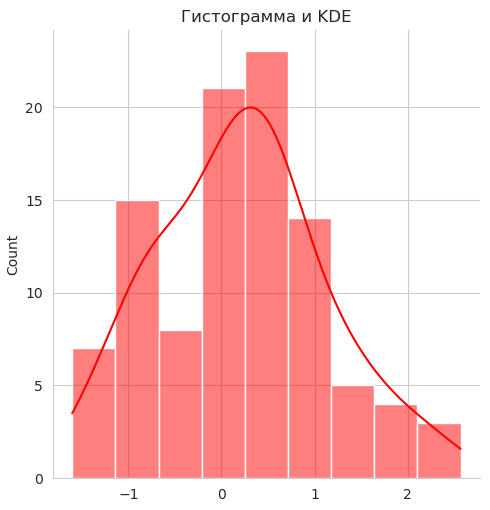

In [70]:
x = sps.norm.rvs(size=100)  # генерируем данные из нормального распределения

with sns.axes_style('whitegrid'):
    sns.displot(data=x, color='red', kde=True)
    plt.gca().set_title('Гистограмма и KDE')

**Boxplot**

Чтобы посмотреть на числовые характеристики на графике и одновременно проверить наличие выбросов, можно использовать `sns.boxplot` (ящик с усами).
Границы "ящика" &mdash; это 25% и 75% квантили (квартили). Его длина называется интерквартильным размахом. "Усы" отстоят от "ящика" на 1.5 размаха. Остальные объекты отображаются точками, их можно признать выбросами.

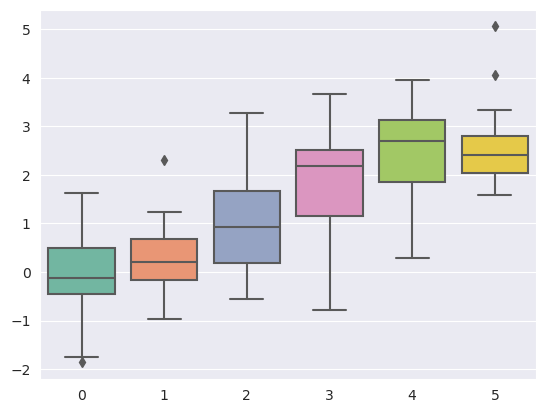

In [71]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    sns.boxplot(data=data, palette='Set2')

**Violinplot**

Этот график похож на boxplot, но он показывает распределение при помощи KDE. Дополнительно можно сравнить распределения при разных знаяениях категориального параметра.

Загрузим датасет tips, который встроен в seaborn. Изначально датасет составлен официантом, который записывал информацию о каждых чаевых, который он получал в течение нескольких месяцев работы в ресторане. Посмотрим, как распределене чаевых зависит от того, курильщик человек или нет, а также от дня недели.

In [72]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


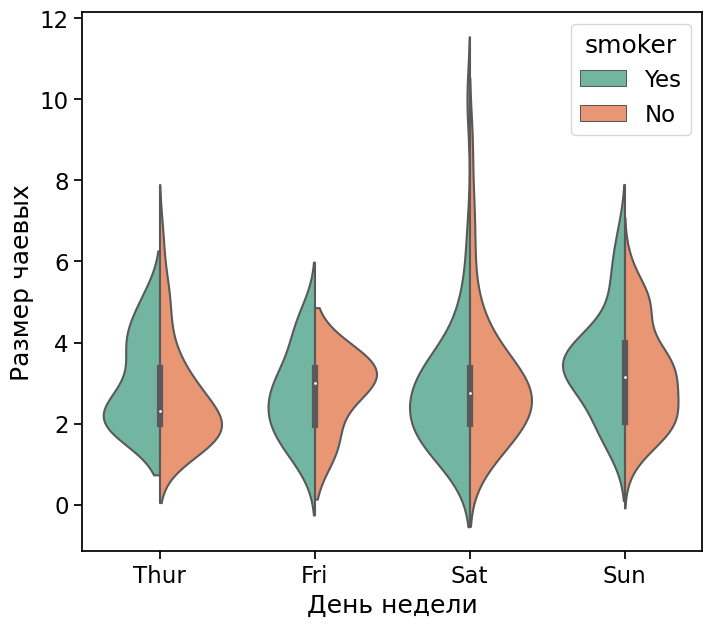

In [73]:
with sns.plotting_context("notebook", font_scale=1.5): 
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Размер чаевых');
    plt.xlabel('День недели');

**Попарное распределение**

Можно построить scatterplot-ы для каждой пары признаков, а также оценку распределения. При этом можно поделить точки по значениям категориального признака.

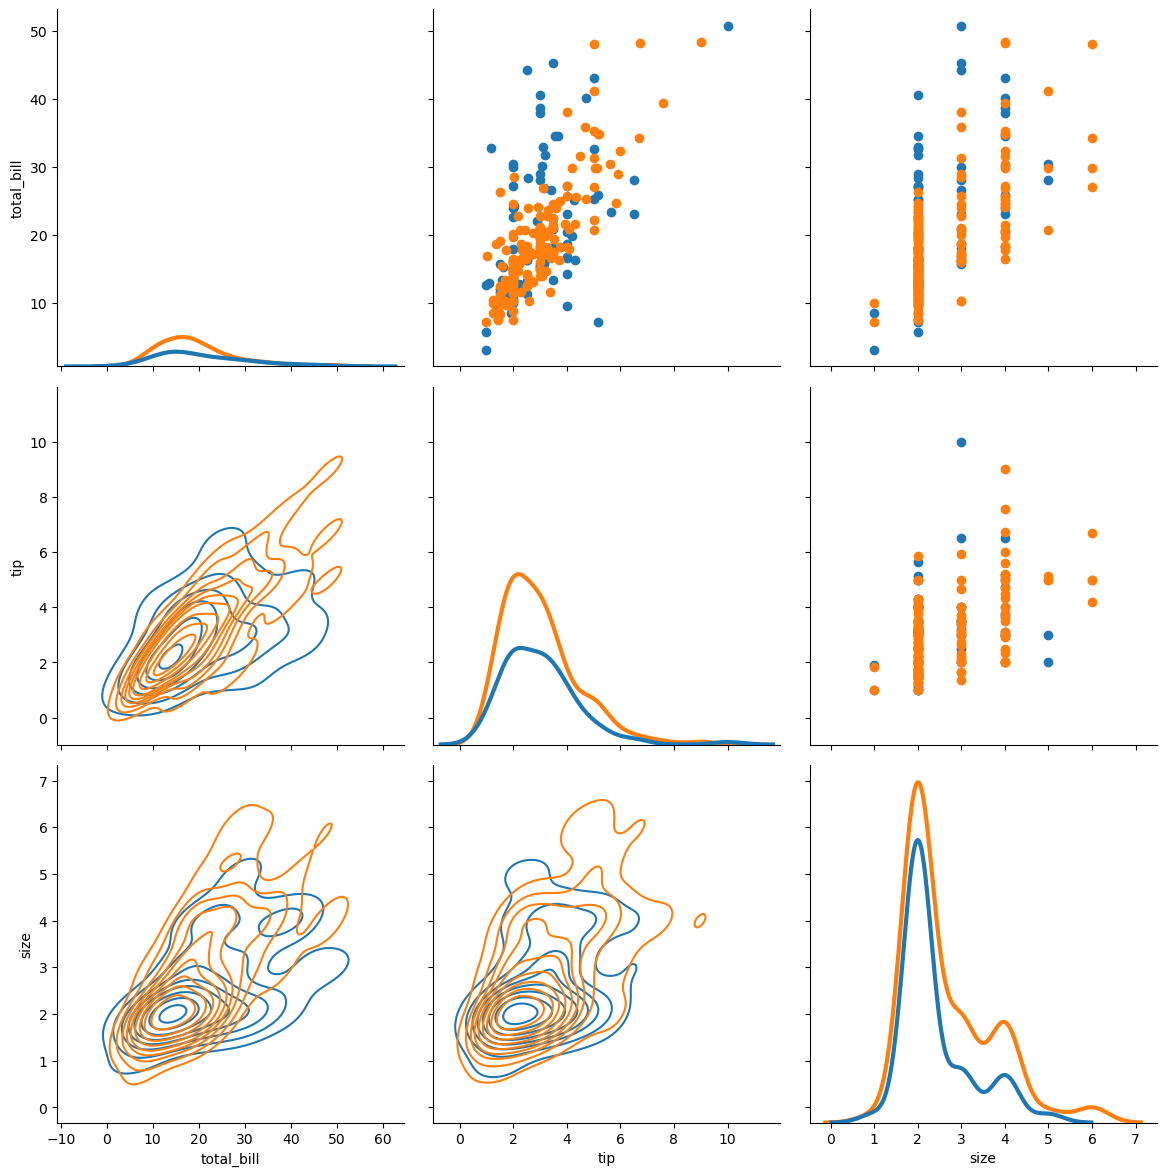

In [74]:
g = sns.PairGrid(tips, hue='smoker', height=4)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Также можно смотреть на **корреляционную матрицу**. Для каждой пары признаков вычисляется коэффициент корреляции между их значениями в датасете. Это может быть полезно для определения зависимых признаков.

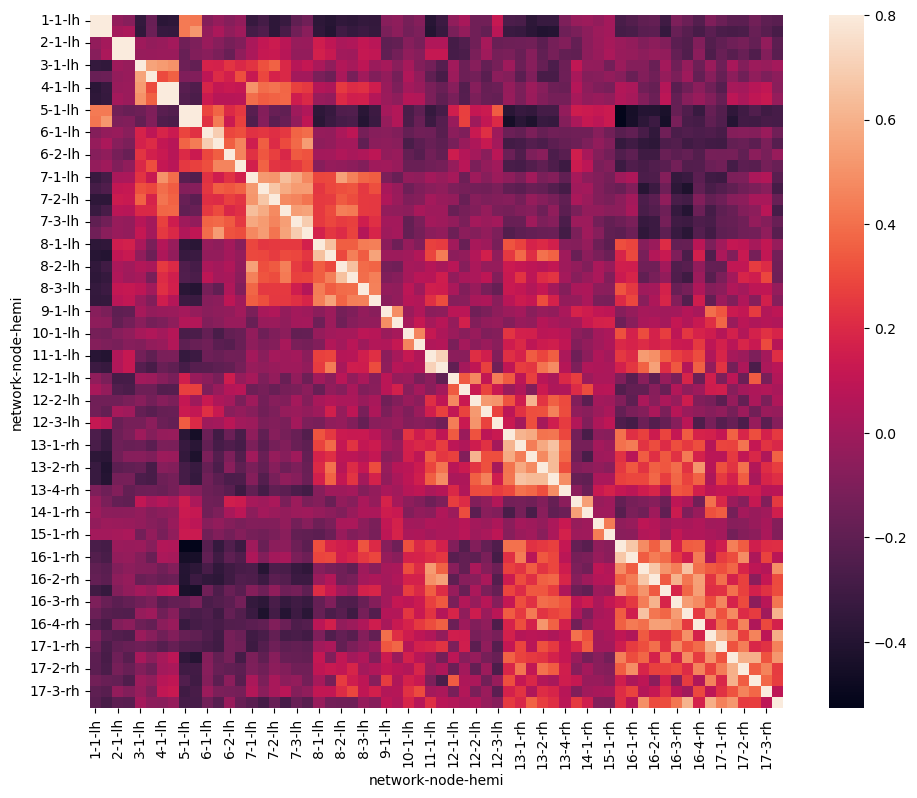

In [75]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Визуализация качества моделей

Во время обучения моделей необходимо следить за их качеством. Полезно строить графики качества в зависимости от параметров модели. Самый простой параметр &mdash; размер обучающего датасета.

Для обучения простых моделей воспользуемся библиотекой `sklearn`. Будем рассматривать модель на основе ближайших соседей, а также SVM &mdash; линейную модель специального вида.

In [77]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Рассмотрим задачу классификации изображений цифр. Загрузим датасет.

In [78]:
digits = load_digits()
X, y = digits.data.astype(int), digits.target.astype(int)

Чтобы определять качество модели, будем пользоваться кросс-валидацией. Несколько раз будем часть выборки назначать тестовой, обучаться на оставшихся данных и проверять качество на тестовой части. Так получится несколько оценок качества, по ним можно построить доверительные интервалы (подробнее о них на следующем занятии).

In [79]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit

Напишем функцию, которая строит график качества в зависимости от количества данных

In [80]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Строит график качества в зависимости от количества данных
    
    Параметры:
        estimator - модель классификации на sklearn
        title - заголовок для графика
        X, y - обучающая выборка
        cv - способ кросс-валидации
        train_sizes - сетка с размерами выборки
    """
    # Задаём свойства графика
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Считаем качества через sklearn
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    
    # Считаем характеристики для доверительного интервала
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Строим графики качества
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Обучим классификаторы

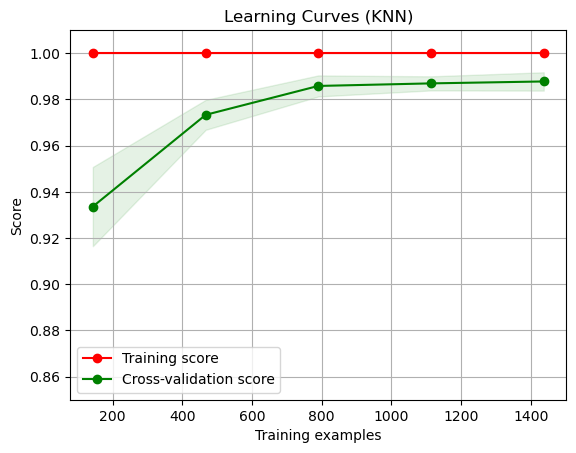

In [81]:
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

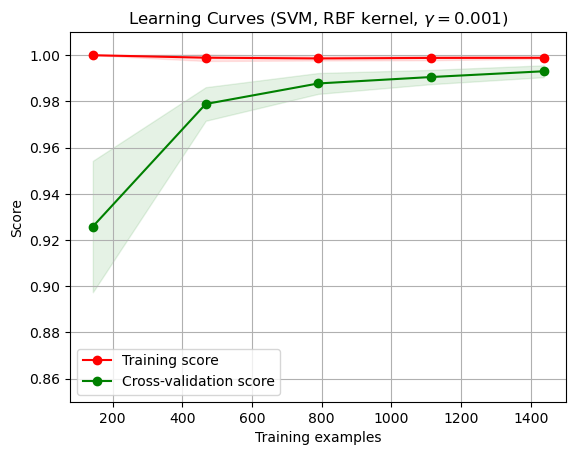

In [82]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.85, 1.01), cv=cv, n_jobs=4)

После получения оценок качества алгоритма их тоже можно визуализировать при помощи boxplot.
Напишем функцию для такой визуализации

In [83]:
def show_scores(model_names, cv_scores):
    """Визуализирует качество моделей с помощью boxplot"""
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    
    for i, (model_name, model_scores) in enumerate(zip(model_names, cv_scores)):
        axs[0].scatter(len(model_scores)*[i], model_scores)
        axs[1].boxplot(model_scores, positions=[i])

    for ax in axs:
        ax.set_xticks(np.arange(len(model_names)))
        ax.set_xticklabels(model_names)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=15)

Запустим на примере

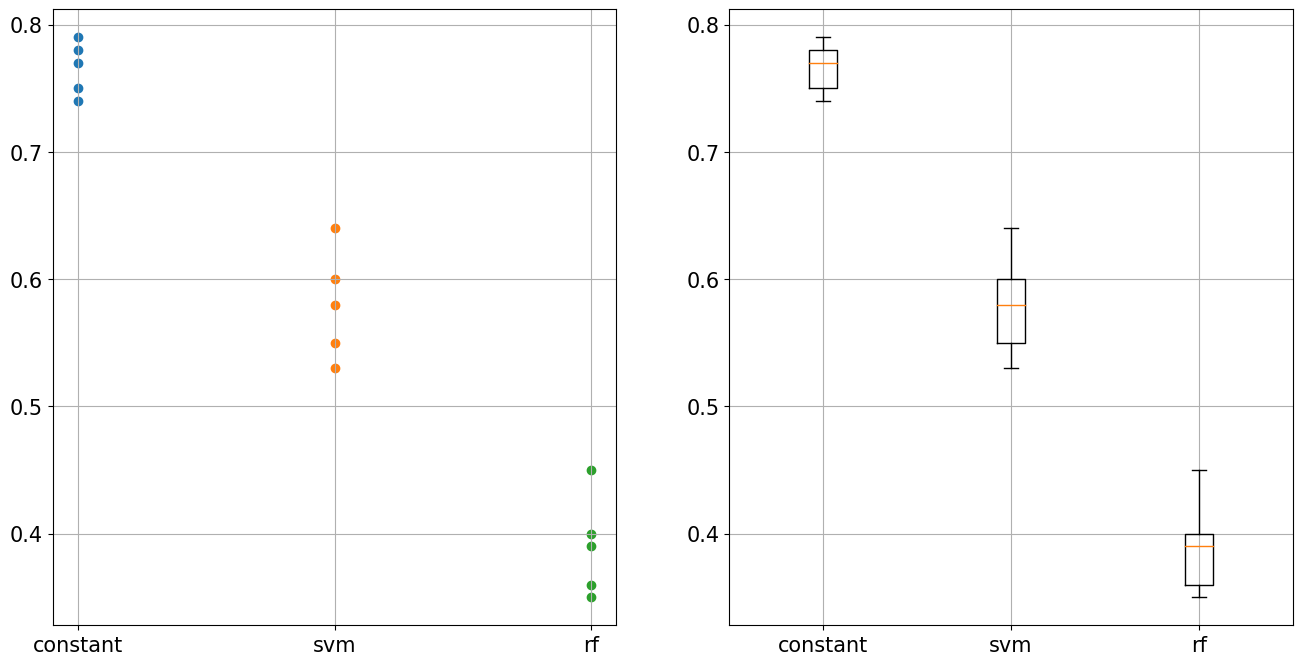

In [84]:
model_names = ['constant', 'svm', 'rf']
cv_scores = [
    [0.75, 0.74, 0.78, 0.77, 0.79],
    [0.55, 0.58, 0.53, 0.60, 0.64],
    [0.35, 0.45, 0.4, 0.36, 0.39]
]

show_scores(model_names, cv_scores)

### Динамическое построение графиков

Если одна итерация обучения занимает много времени, а вас интересует график, использующий данные с прошлых итераций, можно строить графики динамически точка за точкой.

Определим функцию подсчёта ошибки, которая может работать долго. А пока пусть возвращает зашумлённое предыдущее значение ошибки.

In [85]:
def compute_error(prev_error):
    # долгий процесс обучения модели
    np.std(np.random.rand(10000000))
    # вычисление ошибки
    error_level = prev_error * 0.99 + np.random.choice([-0.02, 0.02])

    return error_level

Импортируем библиотеку для динамического построения.

In [86]:
import matplotlib.animation as animation

Определяем шаг нашего динамического построения, на котором в массив ошибок добавляется новая точка. Заметим, что для анимации нужен режим `%matplotlib notebook`

<IPython.core.display.Javascript object>


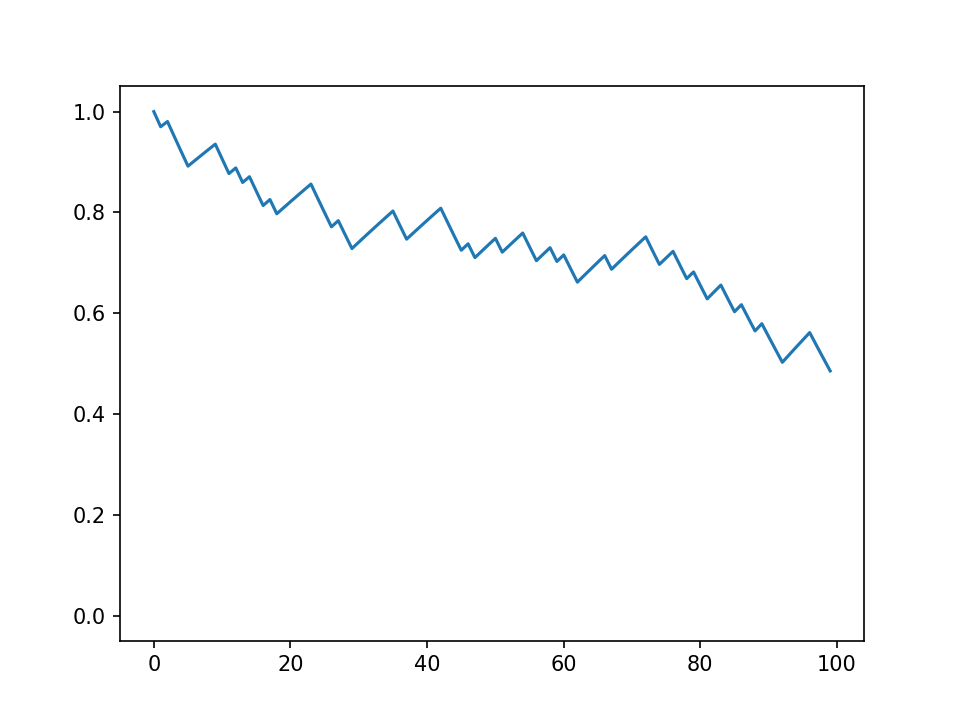

In [87]:
%matplotlib notebook
fig, ax = plt.subplots()

errors = np.zeros(100)
errors[0] = 1.0

line, = ax.plot(errors)

def animate(i):
    errors[i] = compute_error(errors[i-1])
    line.set_ydata(errors)
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200),
                              interval=10, repeat=False)
plt.show()

### Логирование процесса

Если обучение моделей происходит долго, или в вашем алгоритме много итераций, стоит следить за прогрессом. Удобно делать это с помощью интерактивных прогресс-баров из библиотеки `tqdm`.

<img src="https://pp.userapi.com/c841038/v841038634/4cb4a/oQqggELJBrQ.jpg" alt="Drawing" style="width: 500px;"/>

[источник](https://vk.com/weirdreparametrizationtrick)

In [88]:
from tqdm import tqdm
for i in tqdm(range(100)):
    compute_error(0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


In [89]:
from tqdm.notebook import tqdm
for i in tqdm(range(100)):
    compute_error(0)

  0%|          | 0/100 [00:00<?, ?it/s]

### Старайтесь пользоваться высокоуровневыми библиотеками (seaborn, plot.ly и другими). Почти все они базируются на matplotlib и используют его принципы, так что в нем тоже стоит разобраться.

## Как не стоит делать 

![](https://i.imgur.com/tXyZbfn.png)
![](https://i.imgur.com/tJc5q5N.png)
![](https://i.imgur.com/IKCrwbq.png)
![](https://i.imgur.com/xSDUf3H.png)